In [2]:
!pip install tensorflow==1.15.3

     |████████████████████████████████| 110.5MB 95kB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
     |████████████████████████████████| 512kB 52.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=1b5afee447410699c84b4f4924305e5788713bd77969a52932aaaf0b8855a1dc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [3]:
!pip show tensorflow

Name: tensorflow
Version: 1.15.3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, numpy, tensorboard, grpcio, termcolor, google-pasta, wheel, opt-einsum, absl-py, protobuf, gast, astor, wrapt, keras-applications, six, tensorflow-estimator
Required-by: fancyimpute


In [4]:
!pip install tensorflow-gpu==1.15.3

     |████████████████████████████████| 411.0MB 41kB/s 


In [5]:
!pip show tensorflow-gpu

Name: tensorflow-gpu
Version: 1.15.3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, absl-py, numpy, wrapt, gast, protobuf, google-pasta, tensorflow-estimator, astor, keras-preprocessing, tensorboard, termcolor, wheel, keras-applications, opt-einsum, grpcio
Required-by: 


In [6]:
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 10.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [7]:
!pip show keras

Name: Keras
Version: 2.2.4
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, numpy, h5py, pyyaml, scipy, keras-applications, six
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [8]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [9]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [10]:
import sys

sys.path.append('Mask_RCNN')
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [11]:
!pwd

/content/gdrive/My Drive


In [12]:
%cd petrobras2

/content/gdrive/My Drive/petrobras2


In [13]:
!ls

data			imres_data_split.ipynb	imres_train.py
imres_cfg20201229T1807	imres_data_split.py	mask_rcnn_coco.h5
imres_cfg20201229T1947	imres_evaluate.ipynb	mask_rcnn_imres_cfg_0006.h5
imres_data_setup.ipynb	imres_evaluate.py
imres_data_setup.py	imres_train.ipynb


#=======================================================================
# **Projeto de Classificação da Qualidade de Perfis de Imagem LWD** 

# Script para treinar modelo Mask RCNN para classificação automática da resolução

# Data: Outubro de 2020
# Autor: Ralph Piazza 
#=======================================================================

In [14]:
# import libraries

from pathlib import Path
from os import listdir

from numpy import zeros
from numpy import asarray
from numpy import argmin
import pandas as pd
import random

from time import perf_counter
import warnings 

import cv2
import matplotlib.pyplot 
from matplotlib import pyplot

import itertools
from tqdm import tqdm

In [15]:
# global variables

SPLIT_DIR = 'data/'
ANNOT_DIR = 'data/annots/'
IMAGE_DIR = 'data/images/'
 
COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

DATA_NAME = 'imres_dataset'

NUM_CATS = 3
IMAGE_SIZE = 512
IMAGE_WIDTH = 120

# Label information
label_names = ["high_res", "mid_res", "low_res"]

In [38]:
# model configuration

class ImresConfig(Config):
    # define the name of the configuration
    NAME = "imres_cfg"
    # number of classes (background + resolution rating)
    NUM_CLASSES = 1 + 3
    # number of training steps per epoch
    STEPS_PER_EPOCH = 34 #201 402
    VALIDATION_STEPS = 12 # 402
    
    LEARNING_RATE = 1e-4
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 6
    
    BACKBONE = 'resnet50'
    IMAGE_RESIZE_MODE = 'square'
    IMAGE_MIN_DIM = IMAGE_WIDTH
    IMAGE_MAX_DIM = IMAGE_SIZE    
    #IMAGE_CHANNEL_COUNT = 1
    
    IMAGE_SHAPE = [512, 512, 1]

# Prepare and check model configuration
config = ImresConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     6
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 6
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  120
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [18]:
# resizing image

def resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
    return img


In [19]:
# model preparation 

class ImresDataset(Dataset):
    
    # load the dataset file information into a directory
    def load_dataset(self, is_train=True):
        for i, name in enumerate(label_names):
            self.add_class(DATA_NAME, i + 1, name)        
        if(is_train):
            image_list = pd.read_csv(SPLIT_DIR + 'train_list.txt', header=None, index_col=False, sep='/s+', squeeze=True)           
        else:
            image_list = pd.read_csv(SPLIT_DIR + 'test_list.txt', header=None, index_col=False, sep='/s+', squeeze=True)
        
        for filename in listdir(IMAGE_DIR):
            image_id = filename[:-4]
            if(int(image_id) in image_list.values):            
                img_path = IMAGE_DIR + filename
                ann_path = ANNOT_DIR + image_id + '.csv'
                self.add_image(DATA_NAME, image_id=image_id, path=img_path, annotation=ann_path, width=IMAGE_WIDTH, height=IMAGE_SIZE)
        return
                
    # extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
        annot_info = pd.read_csv(filename)
        boxes = list()
        for box in range(len(annot_info.index)):
            xmin = int(annot_info.at[box, 'XMIN'])
            ymin = int(annot_info.at[box, 'YMIN'])
            xmax = int(annot_info.at[box, 'XMAX'])            
            ymax = int(annot_info.at[box, 'YMAX'])
            res_class = int(annot_info.at[box, 'CLASS'])
            info = [xmin, ymin, xmax, ymax, res_class]
            boxes.append(info)
        width = int(IMAGE_WIDTH)
        height = int(annot_info.at[box, 'HEIGHT'])      
        return boxes, width, height
    
    # load the masks for an image
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = self.extract_boxes(path)
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(box[4])
        return masks, asarray(class_ids, dtype='int32')
    
    # load the image location reference 
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
    
    # load an image from the directory into the model
    def load_image(self, image_id):
        info = self.image_info[image_id]
        return resize_image(info['path'])

In [29]:
# load data

warnings.filterwarnings("ignore")

# prepare train set
t0 = perf_counter()
train_set = ImresDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# prepare test/val set
test_set = ImresDataset()
test_set.load_dataset(is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

t1 = (perf_counter() - t0)/60.0
print ('It took', t1, 'minutes to prepare datasets')

Train: 1284
Test: 321
It took 0.0010978308833349123 minutes to prepare datasets


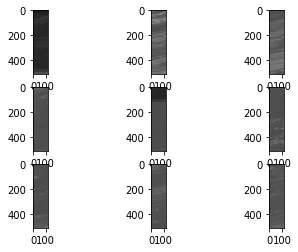

In [26]:
# image visualization

if(False):
    for i in range(6):
        image_id = random.choice(train_set.image_ids)
        print(train_set.image_reference(image_id))
    
        image = train_set.load_image(image_id)
        mask, class_ids = train_set.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, train_set.class_names, limit=4)    

if(True):
    for i in range(9):
        pyplot.subplot(330 + 1 + i)
        image = train_set.load_image(i + 1)
        pyplot.imshow(image)
        mask, _ = train_set.load_mask(i + 1)
        for j in range(mask.shape[2]):
            pyplot.imshow(mask[:, :, j], cmap='gray', alpha=0.3)
    pyplot.show()

In [39]:
# train model

warnings.filterwarnings("ignore")

# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

# train weights (output layers or 'heads')
t0 = perf_counter()
model.train(train_set, test_set, learning_rate=2*config.LEARNING_RATE, epochs=4, layers='heads') #2
t1 = (perf_counter() - t0)/60.0
print ('It took', t1, 'minutes to train last layer')
history = model.keras_model.history.history

# train weights (all layers)
t0 = perf_counter()
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=14, layers='all') #6
t1 = (perf_counter() - t0)/60.0
print ('It took', t1, 'minutes to train all layers')
new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]

# train weights (retrain all layers)
t0 = perf_counter()
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE/5, epochs=20, layers='all') #8
t1 = (perf_counter() - t0)/60.0
print ('It took', t1, 'minutes to retrain all layers')
new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]


Starting at epoch 0. LR=0.0002

Checkpoint Path: ./imres_cfg20201230T0015/mask_rcnn_imres_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (Time

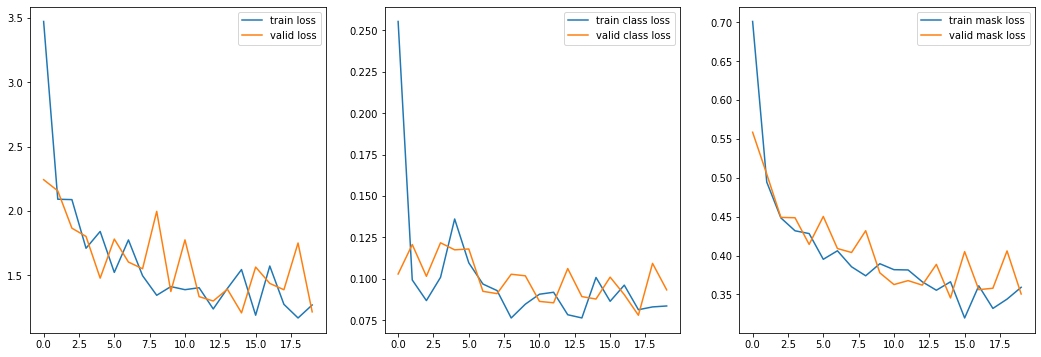

Best epoch:  15
Valid loss:  1.2079066435496013


In [40]:
# visualize training history

epochs = range(20)

pyplot.figure(figsize=(18, 6))

pyplot.subplot(131)
pyplot.plot(epochs, history['loss'], label="train loss")
pyplot.plot(epochs, history['val_loss'], label="valid loss")
pyplot.legend()
pyplot.subplot(132)
pyplot.plot(epochs, history['mrcnn_class_loss'], label="train class loss")
pyplot.plot(epochs, history['val_mrcnn_class_loss'], label="valid class loss")
pyplot.legend()
pyplot.subplot(133)
pyplot.plot(epochs, history['mrcnn_mask_loss'], label="train mask loss")
pyplot.plot(epochs, history['val_mrcnn_mask_loss'], label="valid mask loss")
pyplot.legend()

pyplot.show()

# select best epoch
best_epoch = argmin(history["val_loss"]) + 1
print("Best epoch: ", best_epoch)
print("Valid loss: ", history["val_loss"][best_epoch-1])